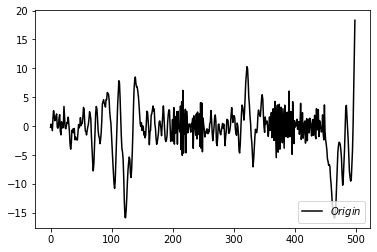

model param :  [-1.87448378 -1.80591022 -1.19772421 -0.3435268 ]
model predict : [ 0.          3.21320927 -4.14752641 ... -3.1761393   2.1372672
 -2.91112993]


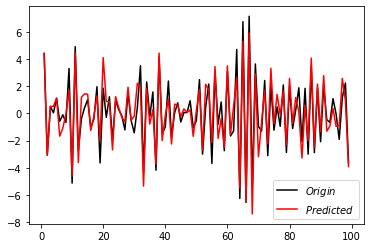

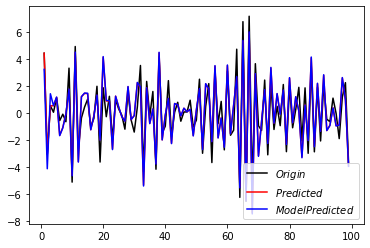

SIZE 100 SSE : 0.989012942031804 , SSEM : 0.9908260634121924
model param :  [-1.86271887 -1.77787833 -1.16337958 -0.3263089 ]
model predict : [ 0.          8.67452207 -7.4409246  ...  3.12228912 -0.06835857
  0.73605189]


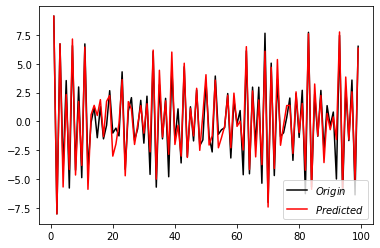

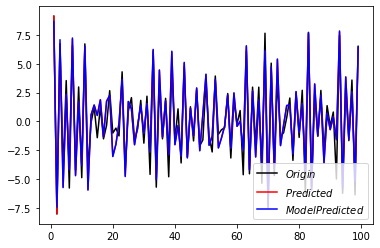

SIZE 2000 SSE : 0.9782582957622086 , SSEM : 0.9960191059145769
model param :  [ 0.93021414 -0.37196305 -0.34315767  0.16064713]
model predict : [ 0.         -0.35843015 -1.09649935 ... -2.06681669 -0.95649302
  0.71791904]


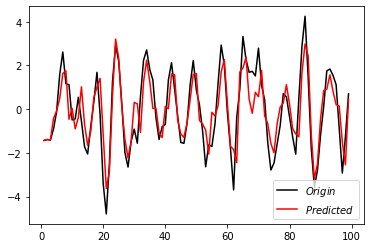

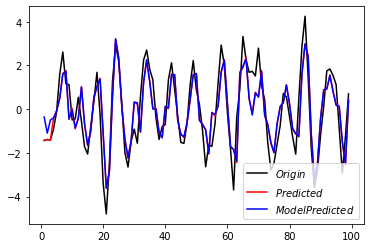

SIZE 100 SSE : 0.989012942031804 , SSEM : 0.9883057797080317
model param :  [ 0.94305693 -0.38223222 -0.33578209  0.1549257 ]
model predict : [ 0.          0.45882939  3.52117303 ...  1.49017312 -0.1915752
 -1.21219011]


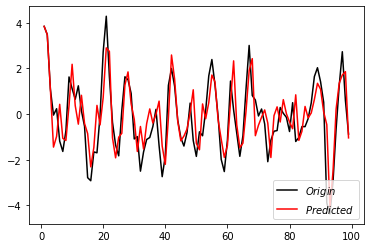

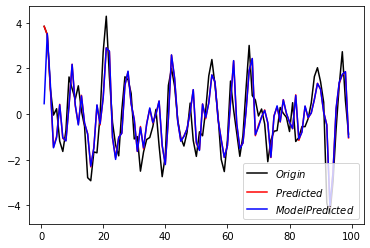

SIZE 2000 SSE : 0.9782582957622086 , SSEM : 0.979786603387658


In [ ]:
#%reset
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(12345)
maparams = np.array([0,0])

def ar_parameters(s): #s = 52 --> np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이용
    # AR(2)
    if s==21: arparams=np.array([.75, -.25])
    elif s==22: arparams=np.array([1.49,-0.653])
    elif s==23: arparams=np.array([-1.079,-0.529])
    
    # Time Series AR(3)
    elif s==31: arparams = np.array([2.146,-1.598,0.409])
    elif s==32: arparams = np.array([0.920, -0.267, -0.266])
    
    # Time Series AR(4)
    elif s==41: arparams = np.array([-1.8448,-1.7654,-1.1659,-0.3324])
    elif s==42: arparams = np.array([0.960, -0.416, -0.301, 0.148])
    
    # Time Series AR(5)
    elif s==51: arparams = np.array([1.840, -0.893, -0.613, 0.879, -0.310])
    elif s==52: arparams = np.array([-0.370, -0.328, 0.102, 0.025, -0.507])
    
    # Time Series AR(6)
    elif s==61: arparams = np.array([-0.770, -0.516, 0.311, 0.115, -0.033, -0.210])
    elif s==62: arparams = np.array([2.400, -2.414, 1.889, -1.586, 0.900, -0.207])
    
    else: 
        arparams=np.array([0,0])
    return arparams
#ar을 생성
def ar_gen(n, arparams,predict_size):                                               # 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감
    np.random.seed(12345)                                              #시드 고정
    maparams = np.array([0,0]) 
    ar = np.r_[1, -arparams]                                           # add zero-lag and negate -> [1,-0.370, -0.328, 0.102, 0.025, -0.507]
    ma = np.r_[1, maparams]                                            # add zero-lag -> [1,0,0]
    y = arma_generate_sample(ar, ma, n)                                # ([1,0,0],[1,-0.370, -0.328, 0.102, 0.025, -0.507],10000)이 들어감 (회귀 , 이동 평균 ,표본 수 샘플 들어감)
    model = sm.tsa.ARMA(y[predict_size :predict_size+5000], (len(arparams), 0)).fit(trend='nc', disp=0) # 이론적 모형 추정 (arparams,0) 차원으로 예측
    print('model param : ',format(model.params))                       # 모델 파라미터 출력                          
    print('model predict :',format(model.predict()))   
    return y, arparams, model #y(표본) , arparams, model 반환

def ar_segment_gen(n):
    np.random.seed(12345)
    s1=list([21,22,31,32,41,42,51,52,61,62])
    y_segment=np.array([])
    for i in s1:
        arparams=ar_parameters(i) # Generation ar series in order of s1
        
        maparams = np.array([0,0])
        ar = np.r_[1, -arparams] # add zero-lag and negate
        ma = np.r_[1, maparams] # add zero-lag
        y = arma_generate_sample(ar, ma, n)
        y_segment=np.append(y_segment, y)
        
    return y_segment

# AR Segment Generation & Plotting
y_s=ar_segment_gen(50)
x=np.arange(len(y_s))
plt.plot()
plt.plot(x, y_s, color='black', label='$Origin$')
plt.legend(loc="lower right")
plt.show()

def predict(y,arparams):
    yt=y.copy()
    for i in range(len(y)-len(arparams)-1):
        yt[i+2]=arparams[0]*y[i+1]+arparams[1]*y[i]
    
    SSE=np.sum((y-yt)**2)/len(yt)
    return y,yt, SSE

def predict_yt_y_t(y,yt,arparams):
    y_t=y.copy()
    for i in range(len(y)-len(arparams)):
        y_t[i+2]=arparams[0]*yt[i+1]+arparams[1]*yt[i]
    
    SSE=np.sum((y-y_t)**2)/len(yt)
    print(SSE)
    return y,yt, y_t, SSE

def predict_arg(y,arparams):                                                                  #표본과 파라미터값 인자              
    yt=y.copy()                                                                               # y(표본) 복사
    for i in range(len(y)-len(arparams)-1):                                                   # 표본길이 - 파라미터 길이 -1만큼 반복
        yt[i+len(arparams)]=0                                                                 # 파라미터 인자길이 + i 인덱스 0으로 초기화
        for j in range(len(arparams)):                                                        # 0으로 초기한 인덱스에 파라미터만큼의 
#            yt[i+len(ar)]=ar[0]*y[i+1]+ar[1]*y[i]                                              arparams[j]*y[i+len(arparams)-j-1] arparam * 이전 값 곱해서 더해주기 
            yt[i+len(arparams)]=arparams[j]*y[i+len(arparams)-j-1]+yt[i+len(arparams)]
    
    SSE=np.sum((y-yt)**2)/len(yt)     # (표본 - 평균 ) ** 제곱 / yt의 길이를 SSE라 지칭
    return y,yt, SSE  # y표본과 계산한 yt , SSE값 반환

def plotting(y,yt, l1):
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.legend(loc="lower right")
    plt.show()


def plottingm(y,yt,ytm,l1):
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.plot(x[1:l1], ytm[1:l1], color='blue', label='$Model Predicted$')
    plt.legend(loc="lower right")
    plt.show()


def plotting_2step(y,yt,y_t,l1):# Ploting Size l1
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.plot(x[1:l1], y_t[1:l1], color='blue', label='$Two-Step Predicted$')
    plt.legend(loc="lower right")
    plt.show()


def normal(y):
    x1=(y-np.min(y))/(np.max(y)-np.min(y))
    return x1 

def re_normal(y1,y):
    y2=y1*(np.max(y)-np.min(y))+np.min(y)
    return y2 

# Time Series Prediction AR(using 4 - 41 parameter )
number=10000                                           # number = 10000
size = 100
s=41  # s=21,22,31,32,41,42,51,52,61,62        52번 파라미터 사용 -> np.array([-0.370, -0.328, 0.102, 0.025, -0.507]) 이용   
arparams=ar_parameters(s)
y, arparams, model=ar_gen(number, arparams,size)  # ar_gen 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감

y,yt,SSE=predict_arg(y[size:size+5000],arparams)             # 표본과 파라미터를 predict_arg에 넣음 ->  # y표본과 계산한 yt , SSE값 반환
ytm=model.predict()                          # 모델 예측
SSEM=np.sum((y-ytm)**2)/len(ytm)

plotting(y,yt, 100)
plottingm(y,yt, ytm, 100)

print('SIZE {} SSE : {} , SSEM : {}'.format(size,SSE, SSEM))

# Time Series Prediction AR(using 4 - 41 parameter )
number=10000                                           # number = 10000
size = 2000
s=41  # s=21,22,31,32,41,42,51,52,61,62        52번 파라미터 사용 -> np.array([-0.370, -0.328, 0.102, 0.025, -0.507]) 이용   
arparams=ar_parameters(s)
y, arparams, model=ar_gen(number, arparams,size)  # ar_gen 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감

y,yt,SSE=predict_arg(y[size:size+5000],arparams)             # 표본과 파라미터를 predict_arg에 넣음 ->  # y표본과 계산한 yt , SSE값 반환
ytm=model.predict()                          # 모델 예측
SSEM=np.sum((y-ytm)**2)/len(ytm)

plotting(y,yt, 100)
plottingm(y,yt, ytm, 100)

print('SIZE {} SSE : {} , SSEM : {}'.format(size,SSE, SSEM))

# Time Series Prediction AR(using 4 - 42 parameter )
number=10000                                           # number = 10000
size = 100
s=42  # s=21,22,31,32,41,42,51,52,61,62        52번 파라미터 사용 -> np.array([-0.370, -0.328, 0.102, 0.025, -0.507]) 이용   
arparams=ar_parameters(s)
y, arparams, model=ar_gen(number, arparams,size)  # ar_gen 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감

y,yt,SSE=predict_arg(y[size:size+5000],arparams)             # 표본과 파라미터를 predict_arg에 넣음 ->  # y표본과 계산한 yt , SSE값 반환
ytm=model.predict()                          # 모델 예측
SSEM=np.sum((y-ytm)**2)/len(ytm)

plotting(y,yt, 100)
plottingm(y,yt, ytm, 100)

print('SIZE {} SSE : {} , SSEM : {}'.format(size,SSE, SSEM))

# Time Series Prediction AR(using 4 - 42 parameter )
number=10000                                           # number = 10000
size = 2000
s=42  # s=21,22,31,32,41,42,51,52,61,62        52번 파라미터 사용 -> np.array([-0.370, -0.328, 0.102, 0.025, -0.507]) 이용   
arparams=ar_parameters(s)
y, arparams, model=ar_gen(number, arparams,size)  # ar_gen 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감

y,yt,SSE=predict_arg(y[size:size+5000],arparams)             # 표본과 파라미터를 predict_arg에 넣음 ->  # y표본과 계산한 yt , SSE값 반환
ytm=model.predict()                          # 모델 예측
SSEM=np.sum((y-ytm)**2)/len(ytm)

plotting(y,yt, 100)
plottingm(y,yt, ytm, 100)

print('SIZE {} SSE : {} , SSEM : {}'.format(size,SSE, SSEM))


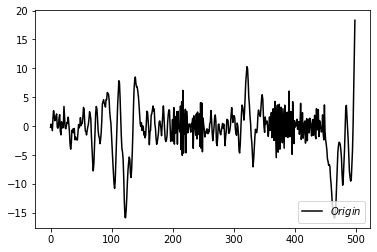

model param :  [ 1.28424315 -0.41891583 -0.37219692  0.49613142]
model predict : [0.         0.5453286  0.85647207 ... 0.63374346 0.45702762 0.38510517]


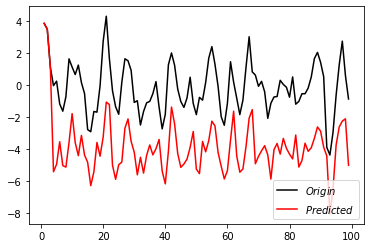

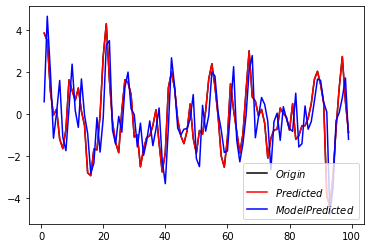

SIZE 2000 SSE : 0.09804354256154388 , SSEM : 1.2695915334672156


In [ ]:
#%reset
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.random.seed(12345)
maparams = np.array([0,0])

def normal(y):
    x1=(y-np.min(y))/(np.max(y)-np.min(y))
    return x1 

def re_normal(y1,y):
    y2=y1*(np.max(y)-np.min(y))+np.min(y)
    return y2 
    
def ar_parameters(s): #s = 52 --> np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이용
    # AR(2)
    if s==21: arparams=np.array([.75, -.25])
    elif s==22: arparams=np.array([1.49,-0.653])
    elif s==23: arparams=np.array([-1.079,-0.529])
    
    # Time Series AR(3)
    elif s==31: arparams = np.array([2.146,-1.598,0.409])
    elif s==32: arparams = np.array([0.920, -0.267, -0.266])
    
    # Time Series AR(4)
    elif s==41: arparams = np.array([-1.8448,-1.7654,-1.1659,-0.3324])
    elif s==42: arparams = np.array([0.960, -0.416, -0.301, 0.148])
    
    # Time Series AR(5)
    elif s==51: arparams = np.array([1.840, -0.893, -0.613, 0.879, -0.310])
    elif s==52: arparams = np.array([-0.370, -0.328, 0.102, 0.025, -0.507])
    
    # Time Series AR(6)
    elif s==61: arparams = np.array([-0.770, -0.516, 0.311, 0.115, -0.033, -0.210])
    elif s==62: arparams = np.array([2.400, -2.414, 1.889, -1.586, 0.900, -0.207])
    
    else: 
        arparams=np.array([0,0])
    return arparams
#ar을 생성
def ar_gen(n, arparams,predict_size):                                               # 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감
    np.random.seed(12345)                                              #시드 고정
    maparams = np.array([0,0]) 
    ar = np.r_[1, -arparams]                                           # add zero-lag and negate -> [1,-0.370, -0.328, 0.102, 0.025, -0.507]
    ma = np.r_[1, maparams]                                            # add zero-lag -> [1,0,0]
    y = arma_generate_sample(ar, ma, n)                                # ([1,0,0],[1,-0.370, -0.328, 0.102, 0.025, -0.507],10000)이 들어감 (회귀 , 이동 평균 ,표본 수 샘플 들어감)
    yn = normal(y)
    model = sm.tsa.ARMA(yn[predict_size :predict_size+5000], (len(arparams), 0)).fit(trend='nc', disp=0) # 이론적 모형 추정 (arparams,0) 차원으로 예측
    print('model param : ',format(model.params))                       # 모델 파라미터 출력                          
    print('model predict :',format(model.predict()))       
    return y, arparams, model #y(표본) , arparams, model 반환

def ar_segment_gen(n):
    np.random.seed(12345)
    s1=list([21,22,31,32,41,42,51,52,61,62])
    y_segment=np.array([])
    for i in s1:
        arparams=ar_parameters(i) # Generation ar series in order of s1
        
        maparams = np.array([0,0])
        ar = np.r_[1, -arparams] # add zero-lag and negate
        ma = np.r_[1, maparams] # add zero-lag
        y = arma_generate_sample(ar, ma, n)
        y_segment=np.append(y_segment, y)
        
    return y_segment

# AR Segment Generation & Plotting
y_s=ar_segment_gen(50)
x=np.arange(len(y_s))
plt.plot()
plt.plot(x, y_s, color='black', label='$Origin$')
plt.legend(loc="lower right")
plt.show()

def predict(y,arparams):
    yt=y.copy()
    for i in range(len(y)-len(arparams)-1):
        yt[i+2]=arparams[0]*y[i+1]+arparams[1]*y[i]
    
    SSE=np.sum((y-yt)**2)/len(yt)
    return y,yt, SSE

def predict_yt_y_t(y,yt,arparams):
    y_t=y.copy()
    for i in range(len(y)-len(arparams)):
        y_t[i+2]=arparams[0]*yt[i+1]+arparams[1]*yt[i]
    
    SSE=np.sum((y-y_t)**2)/len(yt)
    print(SSE)
    return y,yt, y_t, SSE

def predict_arg(y,arparams):                                                                  #표본과 파라미터값 인자  
    yn = normal(y)                              
    yt=yn.copy()                                                                               # y(표본) 복사
    for i in range(len(y)-len(arparams)-1):                                                   # 표본길이 - 파라미터 길이 -1만큼 반복
        yt[i+len(arparams)]=0                                                                 # 파라미터 인자길이 + i 인덱스 0으로 초기화
        for j in range(len(arparams)):                                                        # 0으로 초기한 인덱스에 파라미터만큼의 
#            yt[i+len(ar)]=ar[0]*y[i+1]+ar[1]*y[i]                                              arparams[j]*y[i+len(arparams)-j-1] arparam * 이전 값 곱해서 더해주기 
            yt[i+len(arparams)]=arparams[j]*yn[i+len(arparams)-j-1]+yt[i+len(arparams)]
                                    
    SSE=np.sum((yn-yt)**2)/len(yt)     # (표본 - 평균 ) ** 제곱 / yt의 길이를 SSE라 지칭
    return yn,yt, SSE  # y표본과 계산한 yt , SSE값 반환

def plotting(y,yt, l1):
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.legend(loc="lower right")
    plt.show()


def plottingm(y,yt,ytm,l1):
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.plot(x[1:l1], ytm[1:l1], color='blue', label='$Model Predicted$')
    plt.legend(loc="lower right")
    plt.show()


def plotting_2step(y,yt,y_t,l1):# Ploting Size l1
    x=np.arange(len(y))
    plt.plot(x[1:l1], y[1:l1], color='black', label='$Origin$')
    plt.plot(x[1:l1], yt[1:l1], color='red', label='$Predicted$')
    plt.plot(x[1:l1], y_t[1:l1], color='blue', label='$Two-Step Predicted$')
    plt.legend(loc="lower right")
    plt.show()




# Time Series Prediction AR(using 4 - 42 parameter )
number=10000                                           # number = 10000
size = 2000
s=42  # s=21,22,31,32,41,42,51,52,61,62        52번 파라미터 사용 -> np.array([-0.370, -0.328, 0.102, 0.025, -0.507]) 이용   
arparams=ar_parameters(s)
y, arparams, model=ar_gen(number, arparams,size)  # ar_gen 10000과 np.array([-0.370, -0.328, 0.102, 0.025, -0.507])이 들어감
y_min_max,yt_min_max,SSE=predict_arg(y[size:size+5000],arparams)             # 표본과 파라미터를 predict_arg에 넣음 ->  # y표본과 계산한 yt , SSE값 반환
ytm=model.predict()
ytm = re_normal(ytm,y[size:size+5000])                          # 모델 예측
y = y[size:size+5000]
SSEM=np.sum((y-ytm)**2)/len(ytm)

y_min_max = re_normal(y_min_max,y)
yt_min_max = re_normal(yt_min_max,y)
plotting(y_min_max,yt_min_max, 100)
plottingm(y,y, ytm, 100)

print('SIZE {} SSE : {} , SSEM : {}'.format(size,SSE, SSEM))
